In [1]:
#importing libraries
import numpy as np # calculation
import pandas as pd # Excel for Python
import datetime as dt # allow for date and time series manipulation
import seaborn as sns # a charting package
import matplotlib.pyplot as plt # the original Python chating package

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Datasets/Pricing Analyst Case Study Data Set.xlsx'

In [4]:
df = pd.read_excel(path)
df

,Personal or Business,Business id,Vehicle Type,Cancellation Reason,Cancelled by,Placement Day (1 = Thursday),Placement Time,Cancelled Day,Cancelled Time
0,Business,105328.0,Bike,No Partner,Staff,1.0,14:16:23,1.0,16:06:00
1,Personal,NaN,Bike,Customer error,Staff,1.0,16:20:31,1.0,17:02:50
2,Personal,NaN,Bike,I placed the wrong locations.,Customer,1.0,16:23:35,1.0,16:23:51
3,Personal,NaN,Bike,Customer error,Staff,1.0,16:29:06,1.0,17:03:14
4,Personal,NaN,Bike,Customer error,Staff,1.0,16:33:42,1.0,17:03:24
...,...,...,...,...,...,...,...,...,...
4562,Personal,NaN,Bike,My order is not ready.,Customer,63.0,17:54:46,63.0,17:56:11
4563,Business,103732.0,Bike,Customer error,Staff,63.0,17:55:34,63.0,17:58:41
4564,Personal,NaN,Bike,Delay,Staff,63.0,18:47:47,63.0,18:57:36
4565,Personal,NaN,Bike,Customer error,Staff,63.0,18:58:33,63.0,20:30:20


In [5]:
def explore(x,cols=None, missing=True, types=True, unique=True, duplicates=True):
    divider = "_____"
    print("\n {} \n".format((divider*20)))
    print("Dataframe Makeup \n")
    x.info()
    print("\n {} \n".format((divider*20)))
    
    if cols:
        print("Descriptive Statistics \n\n", x[cols].describe().round(2))
    else:
        print("Descriptive Statistics \n\n", x.describe().round(2))
        
    print("\n {} \n".format((divider*20)))
    print("Shape of dataframe: {}".format(x.shape))
    print("\n {} \n".format((divider*20)))
    
    if missing:
        print("Missing Values \n\n", x.isnull().sum())
        print("\n {} \n".format((divider*20)))
        
    if types:
        print("Data Types \n\n", x.dtypes)
        print("\n {} \n".format((divider*20)))
        
    if unique:
        print("Unique Values per Column \n\n", x.nunique())
        print("\n {} \n".format((divider*20)))
        
    if duplicates:
        print("Duplicate Rows \n\n", x.duplicated().sum())
        print("\n {} \n".format((divider*20)))
    return

In [6]:
explore(df)


 ____________________________________________________________________________________________________ 

Dataframe Makeup 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4567 entries, 0 to 4566
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Personal or Business          4567 non-null   object 
 1   Business id                   1687 non-null   float64
 2   Vehicle Type                  4567 non-null   object 
 3   Cancellation Reason           4567 non-null   object 
 4   Cancelled by                  4567 non-null   object 
 5   Placement Day (1 = Thursday)  4567 non-null   float64
 6   Placement Time                4567 non-null   object 
 7   Cancelled Day                 4567 non-null   float64
 8   Cancelled Time                4567 non-null   object 
dtypes: float64(3), object(6)
memory usage: 321.2+ KB

 _________________________________________________________________

In [7]:
#Finding out the most common cancellation reason

count = df['Cancellation Reason'].value_counts(ascending=True)

table = pd.DataFrame({'Cancellation Reason': count.index, 'Count': count.values})

In [8]:
print(table)

                           Cancellation Reason  Count
0                       My order is not ready.    147
1                                        Delay    166
2                  The driver is too far away.    305
3  No driver has been allocated to my request.    608
4                                   No Partner    644
5                               Customer error    928
6                I placed the wrong locations.   1769


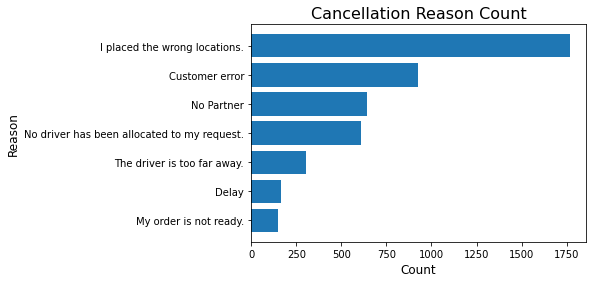

In [9]:
#Create a horizontal bar graph 

plt.barh(count.index, count.values)

#set title and axis labels

plt.title('Cancellation Reason Count', fontsize=16)
plt.xlabel('Count', fontsize = 12)
plt.ylabel('Reason', fontsize = 12)

plt.show()

In [10]:
#What are the biggest reasons for cancelling grouped by Personal and Business?

counts = df.groupby('Personal or Business')['Cancellation Reason'].value_counts()


print(counts)

Personal or Business  Cancellation Reason                        
Business              I placed the wrong locations.                  931
                      Customer error                                 354
                      No Partner                                     254
                      No driver has been allocated to my request.     79
                      Delay                                           36
                      The driver is too far away.                     18
                      My order is not ready.                          15
Personal              I placed the wrong locations.                  838
                      Customer error                                 574
                      No driver has been allocated to my request.    529
                      No Partner                                     390
                      The driver is too far away.                    287
                      My order is not ready.              

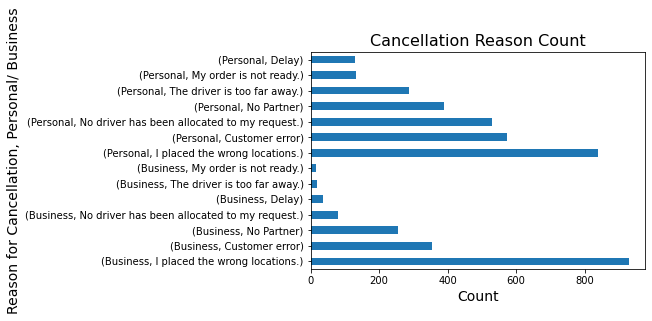

In [11]:

# create a horizontal bar graph with differentiating colors
counts.plot.barh()

# set the title and axis labels
plt.title('Cancellation Reason Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Reason for Cancellation, Personal/ Business', fontsize=14)

# display the plot
plt.show()

#Need to change colours for both Personal and Business

In [12]:
counts1 = df.groupby('Cancelled by')['Cancellation Reason'].value_counts()


counts1

Cancelled by  Cancellation Reason                        
Customer      I placed the wrong locations.                  1769
              No driver has been allocated to my request.     608
              The driver is too far away.                     305
              My order is not ready.                          147
Staff         Customer error                                  928
              No Partner                                      644
              Delay                                           166
Name: Cancellation Reason, dtype: int64

In [13]:
#Who does most cancelling, customers or staff members?

counts_ = df['Business id'].value_counts()


print(counts_.head(25))

103732.0    514
104445.0    149
103925.0     90
103506.0     80
105367.0     57
104045.0     56
103258.0     48
102845.0     47
104529.0     43
104640.0     41
105308.0     36
103511.0     29
104621.0     25
104536.0     20
104782.0     19
104493.0     19
103986.0     19
102877.0     14
104609.0     14
103669.0     14
102936.0     11
103551.0     10
104292.0     10
104704.0      9
104206.0      9
Name: Business id, dtype: int64


In [14]:
#creating a new dataframe for the businesses which have cancellations.
table1 = pd.DataFrame({'Business id': counts_.index, 'Count': counts_.values})
print(table1)

     Business id  Count
0       103732.0    514
1       104445.0    149
2       103925.0     90
3       103506.0     80
4       105367.0     57
..           ...    ...
141     105419.0      1
142     103458.0      1
143     103102.0      1
144     103192.0      1
145     103389.0      1

[146 rows x 2 columns]


In [15]:
#getting the descriptive statistics of the table.
table1['Count'].describe()

count    146.000000
mean      11.554795
std       45.661427
min        1.000000
25%        1.000000
50%        2.000000
75%        5.750000
max      514.000000
Name: Count, dtype: float64

In [16]:
#finding the median
table1['Count'].median()


2.0

In [17]:
df_counts_25 = table1.iloc[:25]
df_counts_25

,Business id,Count
0,103732.0,514
1,104445.0,149
2,103925.0,90
3,103506.0,80
4,105367.0,57
5,104045.0,56
6,103258.0,48
7,102845.0,47
8,104529.0,43
9,104640.0,41


In [18]:
#the 25 companies with the most cancelled orders account for 30% of all cancelled orders
#the 25 companies with the most cancelled orders account for 0.87% of the businesses working with this retail company. 
total_cancellations_25 = df_counts_25['Count'].sum()
print("The total cancellations of the first 25 businesses are:", total_cancellations_25)

The total cancellations of the first 25 businesses are: 1383


In [19]:
#classifying each number as its respective day of the week, given that Thursday =1.
day_names = {1: 'Thursday', 8: 'Thursday', 15: 'Thursday', 22: 'Thursday', 29: 'Thursday', 36: 'Thursday', 43: 'Thursday', 50: 'Thursday', 57: 'Thursday', 
             2: 'Friday', 9: 'Friday', 16: 'Friday', 23: 'Friday', 30: 'Friday', 37: 'Friday', 44: 'Friday', 51: 'Friday', 58: 'Friday',
             3: 'Saturday', 10: 'Saturday', 17: 'Saturday', 24: 'Saturday', 31: 'Saturday', 38: 'Saturday', 45: 'Saturday', 52: 'Saturday', 59: 'Saturday',
             4: 'Sunday', 11: 'Sunday', 18: 'Sunday', 25: 'Sunday', 32: 'Sunday', 39: 'Sunday', 46: 'Sunday', 53: 'Sunday', 60: 'Sunday',
             5: 'Monday', 12: 'Monday', 19: 'Monday', 26: 'Monday', 33: 'Monday', 40: 'Monday', 47: 'Monday', 54: 'Monday', 61: 'Monday',
             6: 'Tuesday', 13: 'Tuesday', 20: 'Tuesday', 27: 'Tuesday', 34: 'Tuesday', 41: 'Tuesday', 48: 'Tuesday', 55: 'Tuesday', 62: 'Tuesday',
             7: 'Wednesday', 14: 'Wednesday', 21: 'Wednesday', 28: 'Wednesday', 35: 'Wednesday', 42: 'Wednesday', 49: 'Wednesday', 56: 'Wednesday', 63: 'Wednesday'}

In [20]:
#mapping the day names to replace the numbers in the placement day column. 
df['Placement Day (1 = Thursday)'] = df['Placement Day (1 = Thursday)'].map(day_names)

In [21]:
#mapping the day names to replace the numbers in the Cancelled day column. 
df['Cancelled Day '] = df['Cancelled Day '].map(day_names)

In [22]:
df

,Personal or Business,Business id,Vehicle Type,Cancellation Reason,Cancelled by,Placement Day (1 = Thursday),Placement Time,Cancelled Day,Cancelled Time
0,Business,105328.0,Bike,No Partner,Staff,Thursday,14:16:23,Thursday,16:06:00
1,Personal,NaN,Bike,Customer error,Staff,Thursday,16:20:31,Thursday,17:02:50
2,Personal,NaN,Bike,I placed the wrong locations.,Customer,Thursday,16:23:35,Thursday,16:23:51
3,Personal,NaN,Bike,Customer error,Staff,Thursday,16:29:06,Thursday,17:03:14
4,Personal,NaN,Bike,Customer error,Staff,Thursday,16:33:42,Thursday,17:03:24
...,...,...,...,...,...,...,...,...,...
4562,Personal,NaN,Bike,My order is not ready.,Customer,Wednesday,17:54:46,Wednesday,17:56:11
4563,Business,103732.0,Bike,Customer error,Staff,Wednesday,17:55:34,Wednesday,17:58:41
4564,Personal,NaN,Bike,Delay,Staff,Wednesday,18:47:47,Wednesday,18:57:36
4565,Personal,NaN,Bike,Customer error,Staff,Wednesday,18:58:33,Wednesday,20:30:20


In [23]:
df['Placement Day (1 = Thursday)'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [24]:
#Identifying which day of the week received the most placements
day_count = df['Placement Day (1 = Thursday)'].value_counts(ascending=False)

table2 = pd.DataFrame({'Placement Day': day_count.index, 'Count': day_count.values})

In [25]:
table2

,Placement Day,Count
0,Friday,1239
1,Thursday,756
2,Wednesday,695
3,Monday,617
4,Tuesday,572
5,Saturday,494
6,Sunday,194


In [26]:
#Identifying which day of the week received the most placements
canc_daycount = df['Cancelled Day '].value_counts(ascending=False)

table3 = pd.DataFrame({'Cancelled Day': canc_daycount.index, 'Count': canc_daycount.values})

In [27]:
table3

,Cancelled Day,Count
0,Friday,1227
1,Thursday,744
2,Wednesday,703
3,Monday,600
4,Tuesday,581
5,Saturday,520
6,Sunday,192


In [28]:
#transforming placement time to datetime format
df['Placement Time'] = pd.to_datetime(df['Placement Time'], format='%H:%M:%S')

In [29]:
#transforming placement time to datetime format
df['Cancelled Time'] = pd.to_datetime(df['Cancelled Time'], format='%H:%M:%S')

In [30]:
#finding the time difference
df['Time Difference'] = df['Cancelled Time'] - df['Placement Time']

In [31]:
df

,Personal or Business,Business id,Vehicle Type,Cancellation Reason,Cancelled by,Placement Day (1 = Thursday),Placement Time,Cancelled Day,Cancelled Time,Time Difference
0,Business,105328.0,Bike,No Partner,Staff,Thursday,1900-01-01 14:16:23,Thursday,1900-01-01 16:06:00,0 days 01:49:37
1,Personal,NaN,Bike,Customer error,Staff,Thursday,1900-01-01 16:20:31,Thursday,1900-01-01 17:02:50,0 days 00:42:19
2,Personal,NaN,Bike,I placed the wrong locations.,Customer,Thursday,1900-01-01 16:23:35,Thursday,1900-01-01 16:23:51,0 days 00:00:16
3,Personal,NaN,Bike,Customer error,Staff,Thursday,1900-01-01 16:29:06,Thursday,1900-01-01 17:03:14,0 days 00:34:08
4,Personal,NaN,Bike,Customer error,Staff,Thursday,1900-01-01 16:33:42,Thursday,1900-01-01 17:03:24,0 days 00:29:42
...,...,...,...,...,...,...,...,...,...,...
4562,Personal,NaN,Bike,My order is not ready.,Customer,Wednesday,1900-01-01 17:54:46,Wednesday,1900-01-01 17:56:11,0 days 00:01:25
4563,Business,103732.0,Bike,Customer error,Staff,Wednesday,1900-01-01 17:55:34,Wednesday,1900-01-01 17:58:41,0 days 00:03:07
4564,Personal,NaN,Bike,Delay,Staff,Wednesday,1900-01-01 18:47:47,Wednesday,1900-01-01 18:57:36,0 days 00:09:49
4565,Personal,NaN,Bike,Customer error,Staff,Wednesday,1900-01-01 18:58:33,Wednesday,1900-01-01 20:30:20,0 days 01:31:47


In [32]:
# Find the average time
avg_time = df['Time Difference'].mean()
avg_time

Timedelta('0 days 00:24:02.420626231')

In [33]:
# Find the median time
med_time = df['Time Difference'].median()
med_time

Timedelta('0 days 00:15:00')

In [34]:
# Find the maximum time
max_time = df['Time Difference'].max()
max_time

Timedelta('0 days 13:48:12')

In [35]:
# Find the minimum time
min_time = df['Time Difference'].min()
min_time

Timedelta('-1 days +00:19:30')

In [36]:
#grouping the time difference by cancellation reason
#using median instead of mean because of top heavy outliers in cancellation durations.
median_time_diff = df.groupby('Cancellation Reason')['Time Difference'].median()

In [37]:
median_time_diff

Cancellation Reason
Customer error                                       0 days 00:39:42
Delay                                                0 days 00:34:01
I placed the wrong locations.                        0 days 00:07:23
My order is not ready.                               0 days 00:11:01
No Partner                                    0 days 00:28:40.500000
No driver has been allocated to my request.   0 days 00:11:45.500000
The driver is too far away.                          0 days 00:09:34
Name: Time Difference, dtype: timedelta64[ns]

In [38]:
# Create a new DataFrame with 'Cancellation Reason' as a column and median time differences as another column
median_time_diff_df = pd.DataFrame({'Cancellation Reason': median_time_diff.index, 'Median Time Difference': median_time_diff.values})

# Set 'Cancellation Reason' as the index
median_time_diff_df.set_index('Cancellation Reason', inplace=True)

# Print the table
median_time_diff_df

,Median Time Difference
Cancellation Reason,
Customer error,0 days 00:39:42
Delay,0 days 00:34:01
I placed the wrong locations.,0 days 00:07:23
My order is not ready.,0 days 00:11:01
No Partner,0 days 00:28:40.500000
No driver has been allocated to my request.,0 days 00:11:45.500000
The driver is too far away.,0 days 00:09:34


In [39]:
# Extract the time of day from the cancelled_time column
df['cancelled_time_of_day'] = df['Cancelled Time'].dt.time

# Calculate the frequency of cancellations for each time of day
cancellation_count_by_time_of_day = df.groupby('cancelled_time_of_day').size()

# Find the time of day with the highest frequency of cancellations
most_common_cancellation_time_of_day = cancellation_count_by_time_of_day.idxmax()

print("The most common time of day for cancellations is:", most_common_cancellation_time_of_day)

The most common time of day for cancellations is: 15:43:56


In [40]:
# Extract the hour of the day from the cancelled_time column
df['cancelled_hour'] = df['Cancelled Time'].dt.hour

# Calculate the frequency of cancellations for each hour of the day
cancellation_count_by_hour = df.groupby('cancelled_hour').size()

# Find the hour of the day with the highest frequency of cancellations
most_common_cancellation_hour = cancellation_count_by_hour.idxmax()

# Calculate the time range for the most common cancellation hour
start_time = pd.to_datetime(str(most_common_cancellation_hour) + ':00:00', format='%H:%M:%S').time()
end_time = pd.to_datetime(str(most_common_cancellation_hour + 1) + ':00:00', format='%H:%M:%S').time()
time_range = f"{start_time} - {end_time}"

print("The most common time range for cancellations is:", time_range)

The most common time range for cancellations is: 15:00:00 - 16:00:00
